## RQ 2

####  Let's explore the dataset by finding simple insights regarding the profile and posts

#### 2.1 Plot the number of posts for each profile in descending order.

##### The Pandas import is performed and the Profiles csv is saved in Parquet

In [10]:
import pandas as pd

profiles_df = pd.read_csv('instagram_profiles.zip', delimiter='\t')

!pip install pyarrow

profiles_df.to_parquet('profiles_df.parquet.snappy')

profiles_df.head(2)


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False


##### Order from highest to lowest with respect to number of posts

In [3]:
profiles_df.sort_values(by='n_posts', ascending=False, inplace=True)

##### Drop NaN values in n_posts column

In [4]:
profiles_df = profiles_df[profiles_df["n_posts"].notna()]

##### Drop n_posts that are equal to 0

In [5]:
profiles_df_without_0 = profiles_df.loc[profiles_df["n_posts"] != 0]

In [6]:
profiles_df_without_0_filtered = profiles_df_without_0[['profile_name','n_posts']]

##### The DataFrame was transformed to Numpy to be able to plot it.

In [10]:
profiles_df_without_0_filtered_array = profiles_df_without_0_filtered.to_numpy()

##### Because the DataFrame to be plotted is quite large, LensPy DynamicPlot was used. "LensPy extends Plotly's Dash to allow you to plot very large datasets (millions of points) while ensuring that figures are still fast, fluid, and responsive" https://pypi.org/project/lenspy/

##### LensPy can build dynamic figures of very large datasets without overwhelming the browser when viewing the figures.

##### When the code is run, you can see that it is on the server:

##### " Dash is running on http://127.0.0.1:8050/ "

##### And there we can see that the user with the highest number of posts is jasem3312 with 188.73k posts.
##### You can move the pointer and see each of the profiles with their amount of posts.

<img src= 'Dash_ADM2.png'>

In [ ]:
pip install lenspy

In [16]:
import numpy as np
import plotly.graph_objects as go
from lenspy import DynamicPlot

x = profiles_df_without_0_filtered_array[:,0]

y = profiles_df_without_0_filtered_array[:,1]

fig = go.Figure(data=[go.Scattergl(x=x, y=y)])

plot = DynamicPlot(fig)
plot.show()




/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/lenspy/__init__.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/mariaalejandrapenaortiz/opt/anaconda3/lib/python3.9/site-packages/flask/app.py", line 1950

#### 2.2 What posts have the highest number of "likes"?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and numbr_likes

In [17]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','numbr_likes']]
    
    df_list.append(filtered)

86it [03:59,  2.78s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_likes"

In [18]:
from functools import reduce

post_likes = reduce(lambda df1, df2: df1.append(df2), df_list)

post_likes.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3432768451.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0


##### .nlargest() was used to select the 10 most popular posts based on the number of likes

##### As a result, it is obtained that the post with the highest number of likes is the post_id "Bt3yaXmAM0d" with 8.8M likes.

In [19]:
top10_post_id = post_likes \
    .nlargest(10, 'numbr_likes')
    
top10_post_id

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


#### 2.3 What posts have the most and the least number of comments?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and number_comments

In [20]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','number_comments']]
    
    df_list.append(filtered)

86it [03:28,  2.43s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_comments"

In [21]:
from functools import reduce

post_comments = reduce(lambda df1, df2: df1.append(df2), df_list)

post_comments.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/3953308785.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,number_comments
0,BXdjjUlgcgq,0.0
1,BVg0pbolYBC,1.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0


##### .nlargest() was used to select the 10 most popular posts based on the number of comments

##### As a result, it is obtained that the post with the highest number of comments is the post_id "Bx2sPAjHviO" with 488k likes.

In [22]:
top10_comments = post_comments \
    .nlargest(10, 'number_comments')
    
top10_comments

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0
5427268,BoQoM-JFkPA,180635.0
25257169,Bwarws1lCok,173988.0
6220011,Bt4qlVDAZMH,170836.0
31689573,Bs9NhQkAcJA,166919.0
14257307,Bzqb95QI_1E,166198.0


##### .nsmallest() was used to select the 10 least popular posts based on the number of comments

##### As a result, it is observed that there are many posts with 0 comments.

In [24]:
least10_comments = post_comments \
    .nsmallest(10, 'number_comments')

least10_comments

,post_id,number_comments
0,BXdjjUlgcgq,0.0
2,BRgkjcXFp3Q,0.0
3,BKTKeNhjEA7,0.0
4,8-NQrvoYLX,0.0
11,Bx-ptmpinBs,0.0
12,Bx9uKZAAHDg,0.0
13,Bx5qGE0AlMM,0.0
23,Bxf-Vl4lK2S,0.0
24,BxCrxafBm-9,0.0
28,BwRE4lYhQ3r,0.0


#### 2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and location_id

In [25]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','location_id']]
    
    df_list.append(filtered)

86it [03:17,  2.30s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_location_id"

In [58]:
from functools import reduce

post_location_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_location_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_5154/2672636998.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14


##### np.any was used to create the null_location_id column and assign 1 to posts that did not have a location ID and 0 to posts that did.

In [63]:
post_location_id['null_location_id'] = np.any(post_location_id[post_location_id.columns[1:]].isnull(), axis=1).astype(int)

In [76]:
post_location_id_tag =post_location_id \
    .groupby(['null_location_id'])  \
    .agg(count=('null_location_id', 'count'))


In [77]:
post_location_id_tag

,count
null_location_id,
0,29737425
1,12972772


##### plot.pie was used to visualize the result.

##### As can be seen in the graph, 30.4% of the posts do not have a location ID, while 69.6% do have a location ID. Therefore, it is concluded that most Instagram users use the location tag so that their followers can see where they are.

<AxesSubplot:title={'center':'Tag Locations'}, ylabel='count'>

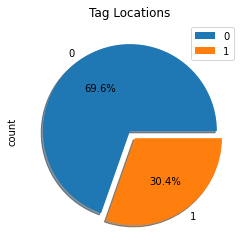

In [78]:
post_location_id_tag.plot.pie(y='count', title='Tag Locations', \
                         shadow=True, autopct='%1.1f%%', \
                         explode=(0, 0.1), startangle=0)

#### 2.5 How many posts include only photos? How many also have videos?

##### Through the for loop and the established chunksize, we select only the columns of interest: post_id and post_type

In [1]:
import pandas as pd
from tqdm import tqdm

df_list = []

for chunk in tqdm(pd.read_csv('instagram_posts.csv', delimiter='\t', chunksize=500000)):
    
    filtered = chunk[['post_id','post_type']]
    
    df_list.append(filtered)

86it [02:57,  2.07s/it]


##### Through the lambda function, an append is made of all the 86 DataFrames that were obtained in the previous loop and they are saved in the DataFrame "post_type_id"

In [2]:
from functools import reduce

post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)

post_type_id.head(5)

/var/folders/gy/6j7jtq4n7m36jvtq0tfc4t880000gn/T/ipykernel_1110/3773087190.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  post_type_id = reduce(lambda df1, df2: df1.append(df2), df_list)


,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1


##### It was grouped by type of post and a count was made to know how many were Post type 1 (pictures) and how many were Post type 3 (pictures and videos).

In [4]:
post_type_id_count =post_type_id \
    .groupby(['post_type'])  \
    .agg(count=('post_type', 'count'))

In [6]:
post_type_id_count

,count
post_type,
1,41534486
2,1134768
3,40943


##### .plot.pie was used to visualize that 97.2% of posts only have pictures and 0.1% of posts have both, pictures and videos.

<AxesSubplot:title={'center':'Post type'}, ylabel='count'>

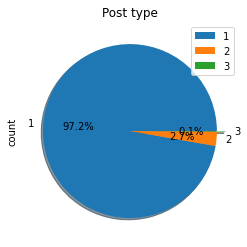

In [9]:
post_type_id_count.plot.pie(y='count', title='Post type', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0, 0.1), startangle=0)

#### 2.6 What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

##### The columns of interest were saved in a DataFrame

In [11]:
business_account = profiles_df[['profile_id','is_business_account']]

##### A group by was made for the column and its values and a count

In [14]:
business_account_count =business_account  \
    .groupby(['is_business_account'])  \
    .agg(count=('is_business_account', 'count'))

##### .plot.pie was used to visualize that 24.8% of the accounts are business accounts. Therefore, it can be said that a very high percentage is used by companies to carry out marketing and advertising campaigns.

<AxesSubplot:title={'center':'Is Business Account?'}, ylabel='count'>

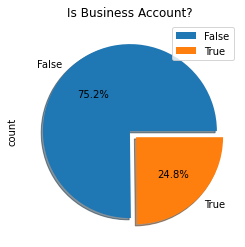

In [17]:
business_account_count.plot.pie(y='count', title='Is Business Account?', \
                    shadow=True, autopct='%1.1f%%', \
                    explode=(0, 0.1), startangle=0)